<a href="https://colab.research.google.com/github/pano1215/Bigdata_analyst_certification-/blob/main/%ED%95%99%EC%8A%B5%EC%9A%A9_Bigdata_S5_03_%EB%AA%A8%EC%88%98%EA%B2%80%EC%A0%95_LAB_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모수 검정

### 0.데이터 다운로드

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_02

fatal: destination path 'data_02' already exists and is not an empty directory.


In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

fatal: destination path 'bigdata' already exists and is not an empty directory.


In [ ]:
import scipy
scipy.__version__

'1.10.1'

In [ ]:
!pip install scipy==1.6.0
# 다른 버전에 필요하다면 이런 식으로 버전을 명시해서 다운받을 수 있음

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 44.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
^C


### 1.정규성 검정(Normality Test)
- 귀무가설 - 데이터셋이 정규분포를 따른다
- 대립가설 - 데이터셋이 정규분포를 따르지 않는다
- 유의수준 0.05 인 경우 : p-value > 0.05, 정규성이 보장된다고 할 수 있다
- 검정통계량 < 임계값, 정규성이 보장된다고 할 수 있다

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data_02/sleepage.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   stime20s  20 non-null     int64
 1   stime40s  20 non-null     int64
 2   ID        20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [ ]:
# 그룹을 나누어 저장함
gA = df['stime20s']
gB = df['stime40s']

In [ ]:
# 정규성 검정 - 1 shapiro wilks test
from scipy.stats import shapiro
A_statistic, A_pvalue = shapiro(gA)
B_statistic, B_pvalue = shapiro(gB)
print(f'그룹A: 검정통계랑: {A_statistic:.4f}, p-value: {A_pvalue:.4f}') # 정규성 만족
print(f'그룹B: 검정통계랑: {B_statistic:.4f}, p-value: {B_pvalue:.4f}') # 정규성 만족X

그룹A: 검정통계랑: 0.9239, p-value: 0.1180
그룹B: 검정통계랑: 0.8810, p-value: 0.0184


In [ ]:
# 정규성 검정 - 2 kstest(kolmogorov-smirnov test)
from scipy.stats import kstest
# 두 개의 데이터가 같은 분포인지 아닌지 검정
# 귀무가설 : 두집단의 분포가 같다
# 대립가설 : 두집단의 분포가 다르다
A_statistic, A_pvalue = kstest(gA, 'norm')
B_statistic, B_pvalue = kstest(gB, 'norm')
print(f'그룹A: 검정통계랑: {A_statistic:.4f}, p-value: {A_pvalue:.4f}') # 정규성 만족X
print(f'그룹B: 검정통계랑: {B_statistic:.4f}, p-value: {B_pvalue:.4f}') # 정규성 만족X

'''
결과
그룹A: 검정통계랑: 0.9987, p-value: 0.0000
그룹B: 검정통계랑: 1.0000, p-value: 0.0000
==> kstest는 데이터가 많을 때 사용해야 유용함
'''

그룹A: 검정통계랑: 0.9987, p-value: 0.0000
그룹B: 검정통계랑: 1.0000, p-value: 0.0000


'\n결과\n그룹A: 검정통계랑: 0.9987, p-value: 0.0000\n그룹B: 검정통계랑: 1.0000, p-value: 0.0000\n==> kstest는 데이터가 많을 때 사용해야 유용함\n'

In [ ]:
# 정규성 검정 - 2 kstest(kolmogorov-smirnov test)
from scipy.stats import kstest, norm
# 두 개의 데이터가 같은 분포인지 아닌지 검정
# 귀무가설 : 두집단의 분포가 같다
# 대립가설 : 두집단의 분포가 다르다


In [ ]:
# 정규성 검정 - 3 normaltest  (20개 이상의 데이터 필요)  # 20개입니다!
from scipy.stats import normaltest

A_statistic, A_pvalue = normaltest(gA)
B_statistic, B_pvalue = normaltest(gB)
print(f'그룹A: 검정통계랑: {A_statistic:.4f}, p-value: {A_pvalue:.4f}') # 정규성 만족
print(f'그룹B: 검정통계랑: {B_statistic:.4f}, p-value: {B_pvalue:.4f}') # 정규성 만족

그룹A: 검정통계랑: 1.1732, p-value: 0.5562
그룹B: 검정통계랑: 2.0450, p-value: 0.3597


In [ ]:
# 정규성 검정 - 4 anderson darling test
# 검정통계량 < 임계값, 정규성이 보장된다고 할 수 있다
from scipy.stats import anderson
rA = anderson(gA) # 결과 : statistic, critical_values, significance_level
rB = anderson(gB)
print('그룹A :', *rA)
# 0.5601097602856164 [0.506 0.577 0.692 0.807 0.96 ]
# 임계값             검정통계량
print('그룹B :', *rB)

그룹A : 0.5601097602856164 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]
그룹B : 0.8918678522034931 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]


### 2.등분산성 검정
- burtlett : 데이터셋의 크기가 서로 다른 2개 이상의 집단 사용 가능
- levene, fligner : 정규성을 충족하지 않는 비모수 데이터에 대해서도 사용가능 (중앙을 median으로 설정)

#### 2-1.iris 데이터
- 등분산 검정 - 3가지 방법으로 실행 후, pvalue 확인

In [ ]:
# 파일 읽어와 내용 확인
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.head(2))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa


In [ ]:
# [1] target='sepal_length', 품종별 그룹을 나누어 저장함
import pandas as pd
target = 'sepal_length'

gA = iris.loc[iris['species'] == 'setosa', target].to_list()
gB = iris.loc[iris['species'] == 'versicolor', target].to_list()
gC = iris.loc[iris['species'] == 'virginica', target].to_list()
print(gA, gB, gC)

[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0] [7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7] [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
groups = [x.to_list() for name, x in  iris.groupby('species')[target]]
gA, gB, gC = groups
print(groups)

[[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0], [7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7], [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]]


In [ ]:
# [2] burtlett 검정
from scipy.stats import bartlett, shapiro

# 정규성검정
_, pvalueA = shapiro(gA)
_, pvalueB = shapiro(gB)
_, pvalueC = shapiro(gC)
print(pvalueA, pvalueB, pvalueC) # 0.05보다 큼 -> 귀무가설 채택 -> 정규성 만족
# _의 의미 : 생략. 이번 경우에서는 statistic 값이 필요 없어서 사용하지 않겠다를 암묵적으로 표현한 것

# 등분산성 검정
statistic, pvalue = bartlett(gA, gB, gC)
print(statistic, pvalue) # 0.05보다 작음 -> 귀무가설 기각 -> 등분산성 만족X

0.4595010578632355 0.4647378921508789 0.25831347703933716
16.005701874401502 0.0003345076070163035


In [ ]:
# [3] levene 의 center는 'mean'으로 지정
from scipy.stats import levene
statistic, pvalue = levene(*groups, center = 'mean')
print(statistic, pvalue) # 0.05보다 작음 -> 귀무가설 기각 -> 등분산성 만족X

7.381091747801267 0.0008817887814641548


In [ ]:
# [4] fligner의 center는 'trimmed', proportiontocut=5% 지정
from scipy.stats import fligner
statistic, pvalue = fligner(*groups, center = 'trimmed', proportiontocut = 0.05)
print(statistic, pvalue) # 0.05보다 작음 -> 귀무가설 기각 -> 등분산성 만족X

13.193438547424174 0.0013648383616752843


#### 2-2.tips 데이터
- 요일별 total_bill 의 등분산성 검정
- levene의 median, trimmed 사용

In [ ]:
# 파일 읽어와 내용 확인
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [ ]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
# [1] target = 'total_bill', 요일별 그룹을 나누어 저장함
import pandas as pd
target = 'total_bill'
groups = [x.to_list() for _, x in tips.groupby('day')[target]]
gA, gB, gC, gD = groups
print(groups)

[[27.2, 22.76, 17.29, 19.44, 16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8, 8.52, 14.52, 11.38, 22.82, 19.08, 20.27, 11.17, 12.26, 18.26, 8.51, 10.33, 14.15, 16.0, 13.16, 17.47, 34.3, 41.19, 27.05, 16.43, 8.35, 18.64, 11.87, 9.78, 7.51, 19.81, 28.44, 15.48, 16.58, 7.56, 10.34, 43.11, 13.0, 13.51, 18.71, 12.74, 13.0, 16.4, 20.53, 16.47, 18.78], [28.97, 22.49, 5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, 12.16, 13.42, 8.58, 15.98, 13.42, 16.27, 10.09], [20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 19.65, 9.55, 18.35, 15.06, 20.69, 17.78, 24.06, 16.31, 16.93, 18.69, 31.27, 16.04, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 16.45, 3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28, 14.73, 10.51, 17.92, 44.3, 22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.0, 7.25, 10.59, 10.63, 50.81, 15.81, 26.59, 38.73, 24.27, 12.76, 30.06, 25.89, 48.33, 

In [ ]:
# [2] levene 의 center는 'median'으로 지정
from scipy.stats import levene, shapiro

# 정규성 검정
_, pvalueA = shapiro(gA)
_, pvalueB = shapiro(gB)
_, pvalueC = shapiro(gC)
_, pvalueD = shapiro(gD)
print(pvalueA, pvalueB, pvalueC, pvalueD) # 정규성 만족하지 않음 -> 정규분포 아
print([f'{shapiro(x)[1]:.4f}' for x in groups])
#     반환되는 두 개의 값 중 두 번째값을 사용한다는 의미

# 등분산성 검정
statistic, pvalue = levene(*groups, center = 'median')
print(statistic, pvalue) # 등분산성 만족

2.8571173970703967e-05 0.04085628688335419 7.991795428097248e-06 0.0035658981651067734
['0.0000', '0.0409', '0.0000', '0.0036']
0.6653578279881612 0.5740792267812198


In [ ]:
# [3] fligner의 center는 'trimmed', proportiontocut=5% 지정
from scipy.stats import fligner

# 등분산성 검정
statistic, pvalue = fligner(*groups, center = 'trimmed', proportiontocut = 0.05)
print(statistic, pvalue) # 등분산성 만족

4.53248366196013 0.20941105566015797


### 3.T 검정(평균 검정)

t-test 이해
- 스튜던트 t-테스트(Student's t-test)라고도 하며, 검정 통계량이 귀무가설 하에서 t-분포를 따르는 통계적 가설 검정
- 표본을 사용한 모평균 검정 및 두 데이터 세트(집단)의 모평균이 서로 유의하게 다른지 여부를 판별 할 수 있음
- 검정통계량이 정규 분포를 따르며 모집단의 분산, 표준편차를 알지 못할 때 표본으로 부터 추정된 분산/표준편차를 사용해 검정함
- t-test를 실시하기 위해서는 정규성 및 등분산성의 조건이 만족되어야 함


#### 3-1.One sample t-test
- stats.ttest_1samp 사용
- 20대 평균 수면시간에 대한 one samle t-test
- 유의수준은 5% 사용
- 숫자는 반올림하여 소수점 아래 4번째 자리까지 표시

In [ ]:
# [1] 수면 시간 정보가 포함된 파일 불러오기
import pandas as pd

df = pd.read_csv("./data_02/sleepage.csv")
print(df.shape)
df.T

(20, 3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
stime20s,4,4,5,5,6,6,7,3,8,7,8,8,7,7,7,6,8,5,6,6
stime40s,5,5,6,7,6,7,7,5,5,6,8,7,6,6,8,7,7,6,5,8
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


In [ ]:
# [1] 20대의 수면시간에 대해 정규성 검정
# one sample이므로 등분산 검정 필요 없음
from scipy.stats import shapiro

statistic, pvalue = shapiro(df['stime20s'])
print(round(statistic, 4), round(pvalue, 4))
print('기각' if pvalue < 0.05 else '채택') # 귀무가설 채택 : 정규성을 만족한다

0.9239 0.118
채택


In [ ]:
# [2] 20대의 수면시간에 대해 평균 구하기
sleep = df['stime20s'].mean()
print(round(sleep, 4), f'{sleep:.04f}')

6.15 6.1500


가설 1.alternative='two-sided'
- 귀무가설 - 20대 수면시간의 평균은 6시간이다.
- 대립가설 - 20대 수면시간의 평균은 6시간이 아니다.

In [ ]:
# [3] One Sample t-test 수행
from scipy.stats import ttest_1samp
popmean = 5
statistic, pvalue = ttest_1samp(df['stime20s'], popmean, alternative = 'two-sided')
print(round(statistic, 4), round(pvalue, 4)) # 0.4592 0.6513

3.5204 0.0023


In [ ]:
# [4] 가설 결과
# p-value 가 0.05보다 크다
# 귀무가설 채택
# 귀무가설 - 20대 수면시간의 평균은 6시간이다.
print('기각' if pvalue < 0.05 else '채택')

기각


가설-2. alternative='less'
- 귀무가설 - 20대 수면시간의 평균은 6시간 보다 크거나 같다.
- 대립가설 - 20대 수면시간의 평균은 6시간 보다 작다

In [ ]:
# [5] One Sample t-test 수행
from scipy.stats import ttest_1samp

statistic, pvalue = ttest_1samp(df['stime20s'], 6, alternative = 'less')
print(round(statistic, 4), round(pvalue, 4)) # 0.4592 0.6743

0.4592 0.6743


In [ ]:
# [6] 가설 결과
# p-value 가 0.05보다 크다
# 귀무가설 채택
# 귀무가설 - 20대 수면시간의 평균은 6시간 보다 크거나 같다.
print('기각' if pvalue < 0.05 else '채택')

채택


가설-3. alternative='greater'
- 귀무가설 - 20대 수면시간의 평균은 6시간 보다 작거나 같다.
- 대립가설 - 20대 수면시간의 평균은 6시간 보다 크다

In [ ]:
# [7] One Sample t-test 수행
from scipy.stats import ttest_1samp

statistic, pvalue = ttest_1samp(df['stime20s'], 6, alternative = 'greater')
print(round(statistic, 4), round(pvalue, 4)) # 0.4592 0.3257

0.4592 0.3257


In [ ]:
# [8] 가설 결과
# p-value 가 0.05보다 크다
# 귀무가설 채택
# 귀무가설 - 20대 수면시간의 평균은 6시간 보다 작거나 같다.
print('기각' if pvalue < 0.05 else '채택')

채택


In [ ]:
# [9] 95% 신뢰구간 구하기
from scipy.stats import t, sem
target = df['stime20s']
lower, upper = t(df = len(target) - 1).interval(0.95, loc = target.mean(), scale = sem(target))
print(f'{lower:.4f} ~ {upper:.4f}')

5.4663 ~ 6.8337


#### 3-2.Two-sample t-test
- 두집단 A, B의 평균 차이가 유의미한지 확인하는 용도
- 20대와 40대의 수면 시간은 같다
- stats.test_ind : (two INDependent sample이라 해서 ttest_ind )
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
- t값과 two-tail p-value를 반환함
- ttest_ind(a, b, equal_var=False) : Welch's t-test 수행 (등분산이 아닌 경우)

In [ ]:
# [1] 수면 시간 정보가 포함된 파일 불러오기
import pandas as pd
df2 = pd.read_csv('./data_02/sleepage.csv')
print(df2.shape)
df2.T

# ttest_ind(a, b, equal_var=False) : 등분산 검정

(20, 3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
stime20s,4,4,5,5,6,6,7,3,8,7,8,8,7,7,7,6,8,5,6,6
stime40s,5,5,6,7,6,7,7,5,5,6,8,7,6,6,8,7,7,6,5,8
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


In [ ]:
# [2] 그룹 분할하기
groupA = df2.loc[:, 'stime20s']
groupB = df2.loc[:, 'stime40s']


In [ ]:
# [3] 그룹별 평균 구하기
print(round(groupA.mean(), 4), round(groupB.mean(), 4))

6.15 6.35


In [ ]:
# [4] 등분산 검정 - 3가지 방법으로 실행 후, pvalue 확인
from scipy.stats import levene, fligner, bartlett
from scipy.stats import shapiro

# 정규성 검정
statistic, pvalueA = shapiro(groupA) # 0.0.1180 정규성 만족
statistic, pvalueB = shapiro(groupB)  # 0.0184 정규성 만족
print(f'{pvalueA:.04f}, {pvalueB:.04f}')

# 등분산성 검정
statisticA, pvlaueA = levene(groupA, groupB) # 0.1180 등분산 만족
statisticB, pvlaueB = fligner(groupA, groupB) # 0.0184 등분산 만족
statisticC, pvlaueC = bartlett(groupA, groupB) # 0.1475 등분산 만족
print(f'{pvalueA:.04f}, {pvalueB:.04f}, {pvlaueC:.04f}')

0.1180, 0.0184
0.1180, 0.0184, 0.1475


In [ ]:
# 등분산 가정을 만족하지 않으면(equal_var=False) Welch's T-test를 수행한다.

가설1. alternative='two-sided'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0과 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0과 같지 않다
- 귀무가설 : groupA, groupB의 평균은 동일하다
- 대립가설 : groupA, groupB의 평균은 동일하지 않다

In [ ]:
# [5] two-sample t-test 수행
from scipy.stats import ttest_ind
statistic, pvalue = ttest_ind(groupA, groupB, alternative = 'two-sided')
print(f'{statistic:.04f}, {pvalue:.04f}') # -0.4988, 0.6208

-0.4988, 0.6208


In [ ]:
# [6] 가설 결과
# pvalue가 0.05보다 큰 값 : 0.6208
# 귀무가설을 채택해야 함
# 즉, 20대와 40대의 평균 수명 시간에 차이가 없다 => 동일
print('기각' if pvalue < 0.05 else '채택')

채택


가설2. alternative='less'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0보다 크거나 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0보다 작다
- 귀무가설 : groupA의 평균이 groupB의 평균보다 크거나 같다
- 대립가설 : groupA의 평균이 groupB의 평균보다 작다

In [ ]:
# [7] two-sample t-test 수행
from scipy.stats import ttest_ind

statistic, pvalue = ttest_ind(groupA, groupB, alternative = 'less')
print(f'{statistic:.04f}, {pvalue:.04f}') # -0.4988, 0.3104

-0.4988, 0.3104


In [ ]:
# [8] 가설 결과
# pvalue가 0.05보다 큰 값 : 0.3104
# 귀무가설을 채택해야 함
# 즉, groupA의 평균이 groupB의 평균보다 크거나 같다
#     groupA의 평균 - groupB의 평균이 0보다 크거나 같다
print('기각' if pvalue < 0.05 else '채택')

채택


가설3. alternative='greater'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0보다 작거나 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0보다 크다
- 귀무가설 : groupA의 평균이 groupB의 평균보다 작거나 같다
- 대립가설 : groupA의 평균이 groupB의 평균보다 크다

In [ ]:
# [9] two-sample t-test 수행
from scipy.stats import ttest_ind

statistic, pvalue = ttest_ind(groupA, groupB, alternative = 'greater')
print(f'{statistic:.04f}, {pvalue:.04f}') # -0.4988, 0.6896

-0.4988, 0.6896


In [ ]:
# [10] 가설 결과
# pvalue가 0.05보다 큰 값 :0.6896
# 귀무가설을 채택해야 함
# 즉, groupA의 평균이 groupB의 평균보다 작거나 같다
#     groupA의 평균 - groupB의 평균이 0보다 작거나 같다
print('기각' if pvalue < 0.05 else '채택')

채택


#### 3-3.Paired t-test
- 동일한 특성을 같는 두집단 A, B의 평균 차이가 유의미한지 확인하는 용도
- 처치 전/후 비교(효과 검정), 한 집단에 대해 두 가지 방법에 대한 차이 검정 등에 사용
- 등분산성 검정은 하지 않아도 됨
- 두 약 투여에 따른 추가 수면 시간 평균의 차이가 있는가?
- stats.ttest_rel: (two RELated samples)

In [ ]:
# [1] 데이터 가져오기
import pandas as pd
import numpy as np
df2 = pd.read_csv('./data_02/sleep.csv')
print(df2.shape)
df2.T

(20, 3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
extra,0.7,-1.6,-0.2,-1.2,-0.1,3.4,3.7,0.8,0.0,2.0,1.9,0.8,1.1,0.1,-0.1,4.4,5.5,1.6,4.6,3.4
group,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0


In [ ]:
# [2] 그룹 나누기
gA = df2.loc[df2.group == 1, 'extra']
gB = df2.loc[df2.group == 2, 'extra']

In [ ]:
# [3] 정규성 검정(shapiro)
from scipy.stats import shapiro

statisticA, pvalueA = shapiro(gA)
statisticB, pvalueB = shapiro(gB)
print(f'{statisticA:.4f} {pvalueA:.4f}') # 0.9258 0.4079
print(f'{statisticB:.4f} {pvalueB:.4f}') # 0.9193 0.3511 귀무 채

0.9258 0.4079
0.9193 0.3511


In [ ]:
# [4] 정규성 검정(normaltest) - N>=20
from scipy.stats import  normaltest

normaltest(gA)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.8834543265697302, pvalue=0.6429250250799996)

In [ ]:
# [5] gA와 gB의 평균 구하기

meanA, meanB = gA.mean(), gB.mean()
print(f'{meanA:.4f}, {meanB:.4f}') # 0.7500, 2.3300

0.7500, 2.3300


가설1. alternative='two-sided'
- 귀무가설 : gA의 평균 - gB의 평균이 0과 같다
- 대립가설 : gA의 평균 - gB의 평균이 0과 같지 않다
- 귀무가설 : gA와 gB의 평균은 같다
- 대립가설 : gA와 gB의 평균은 같지 않다

In [ ]:
# [6] Paired t-test
from scipy.stats import ttest_rel

statistic, pvalue = ttest_rel(gA, gB, alternative = 'two-sided')
print(f'{statistic:.4f} {pvalue:.4f}') # -4.0621 0.0028

-4.0621 0.0028


In [ ]:
# [7] 결과해석

# pvalue가 0.05보다 작은 값 :0.0028
# 귀무가설을 기각해야 함
# 즉, gA의 평균 - gB의 평균이 0과 같지 않다
#     gA와 gB의 평균은 같지 않다
print('기각' if pvalue < 0.05 else '채택')

기각


가설2. alternative='less'
- 귀무가설 : gA의 평균 - gB의 평균이 0보다 크거나 같다
- 대립가설 : gA의 평균 - gB의 평균이 0보다 작다
- 귀무가설 : gA의 평균이 gB의 평균보다 크거나 같다
- 대립가설 : gA의 평균이 gB의 평균보다 작다

The t-statistic is calculated as np.mean(a - b)/se, where se is the standard error. Therefore, the t-statistic will be positive when the sample mean of a - b is greater than zero and negative when the sample mean of a - b is less than zero

In [ ]:
# [8] Paired t-test
from scipy.stats import ttest_rel

statistic, pvalue = ttest_rel(gA, gB, alternative = 'less')
print(f'{statistic:.4f} {pvalue:.4f}') # -4.0621 0.0014

-4.0621 0.0014


In [ ]:
# [9] 결과해석

# pvalue가 0.05보다 작은 값 :0.0014
# 귀무가설을 기각해야 함
# 즉, gA의 평균 - gB의 평균이 0보다 크거나 같다
#     gA의 평균이 gB의 평균보다 작다
print('기각' if pvalue < 0.05 else '채택')

기각


가설3. alternative='greater'
- 귀무가설 : gA의 평균 - gB의 평균이 0보다 작거나 같다
- 대립가설 : gA의 평균 - gB의 평균이 0보다 크다
- 귀무가설 : gA의 평균이 gB의 평균보다 작거나 같다
- 대립가설 : gA의 평균이 gB의 평균보다 크다

In [ ]:
# [10] Paired t-test
from scipy.stats import ttest_rel

statistic, pvalue = ttest_rel(gA, gB, alternative = 'greater')
print(f'{statistic:.4f} {pvalue:.4f}') # -4.0621 0.9986

-4.0621 0.9986


In [ ]:
# [11] 결과해석

# pvalue가 0.05보다 작은 값 :0.9986
# 귀무가설을 채택해야 함
# 즉, gA의 평균 - gB의 평균이 0보다 크다
#     gA의 평균이 gB의 평균보다 크다
print('기각' if pvalue < 0.05 else '채택')

채택


#### 3-4.분류 모델에서 활용

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/1st_Train.csv')
data.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


1개 연속형 변수, 1개 범주형 변수 (2개 범주)
- 범주별로 연속형 변수의 평균 차이가 있는지 검정한다

**정규성을 만족하지 않는 경우 Wilcoxon rank sum test, Mann-Whitney U test를 사용하는 것이 좋습니다.  여기에서는 t-test를 사용했습니다.**
**정규성을 만족하지 않는 경우 등분산성 검정의 경우 levene을 사용하는 것이 좋습니다.**

In [ ]:
# t-test
# 연속형 변수 : 'Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered'
# 범주형 변수 : 'Reached.on.Time_Y.N'

#                       정규성           등분산
from scipy.stats import shapiro, kstest, bartlett
from scipy.stats import ttest_ind

# [1] 그룹 나누기
feature = 'Cost_of_the_Product'
condition_0 = data['Reached.on.Time_Y.N'] == 0
condition_1 = data['Reached.on.Time_Y.N'] == 1
group0 = data.loc[condition_0, feature]
group1 = data.loc[condition_1, feature]
print(feature, group0.shape, group1.shape)

# [2] 정규성, 등분산성 검정
statistic, pvalue = shapiro(group0)
print(f'shapiro - statistic : {statistic:.4f} pvalue : {pvalue:.4f}') # statistic : 0.9719 pvalue : 0.0000 -> p가 0.05 이하라서 정규성을 갖지 않음
statistic, pvalue = shapiro(group1)
print(f'shapiro - statistic : {statistic:.4f} pvalue : {pvalue:.4f}') # statistic : 0.9723 pvalue : 0.0000 -> p가 0.05 이하라서 정규성을 갖지 않음

statistic, pvalue = kstest(group0, 'norm')
print(f'kstest - statistic : {statistic:.4f} pvalue : {pvalue:.4f}') # statistic : 1.0000 pvalue : 0.0000 -> p가 0.05 이하라서 정규성을 갖지 않음
statistic, pvalue = kstest(group1,  'norm')
print(f'kstest - statistic : {statistic:.4f} pvalue : {pvalue:.4f}') # statistic : 1.0000 pvalue : 0.0000 -> p가 0.05 이하라서 정규성을 갖지 않음

# 등분산성 검정
statistic, pvalue = bartlett(group0, group1)
print(f'bartlett - statistic : {statistic:.4f} pvalue : {pvalue:.4f}') # statistic : 0.2039 pvalue : 0.6516 -> 0.05 이상이라서 등분산성을 만족한다

# [3] ttest_ind
statistic, pvalue = ttest_ind(group0, group1)
print(f'ttest_ind - statistic : {statistic:.4f} pvalue : {pvalue:.4f}') # statistic : 7.7378  pvalue : 0.0000

# [4] 결론
# pvalue가 0.05보다 작기 때문에 귀무가설 기각
# 두 그룹의 평균이 다르
# statistic : 7.7378 -> group0의 평균이 더 크다
mean_g0, mean_g1 = group0.mean(), group1.mean()
print(f'{mean_g0:.4f}, {mean_g1:.4f}')
#        214.4986,      207.2892

Cost_of_the_Product (4436,) (6563,)
shapiro - statistic : 0.9719 pvalue : 0.0000
shapiro - statistic : 0.9723 pvalue : 0.0000
kstest - statistic : 1.0000 pvalue : 0.0000
kstest - statistic : 1.0000 pvalue : 0.0000
bartlett - statistic : 0.2039 pvalue : 0.6516
ttest_ind - statistic : 7.7378 pvalue : 0.0000
214.4986, 207.2892


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
def my_ttest_ind(data, feature, target):
  #                    연속형   범주형
    group0 = data.loc[data[target] == 0, feature]
    group1 = data.loc[data[target] == 1, feature]
    mean_g0, mean_g1 = group0.mean(), group1.mean()
    print(f'{mean_g0:.4f}, {mean_g1:.4f}')
    _, pvalue = ttest_ind(group0, group1)
    print(f'ttest_ind - p-value:{pvalue:.4f}')
    print('유의미' if pvalue < 0.05 else '의미가 없다')
    print()

# 'Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered'
for feature in ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered']:
    print(feature)
    my_ttest_ind(data, feature, 'Reached.on.Time_Y.N')

Cost_of_the_Product
214.4986, 207.2892
ttest_ind - p-value:0.0000
유의미

Weight_in_gms
4168.6684, 3272.6401
ttest_ind - p-value:0.0000
유의미

Discount_offered
5.5460, 18.6637
ttest_ind - p-value:0.0000
유의미



#### 3-5.모평균에 관한 t-test
A 회사에서 판매하는 모니터는 평균 5개 보다 적은 불량화소를 포함한다고 주장한다. 이 주장을 판단하기 위해서 데이터를 수집했으며, 주어진 데이터(data_02/defective.csv)에는 모니터 25개에서 조사한 불량화소 개수가 저장되어 있다.
- 불량화소의 개수는 정규분포를 따른다고 할 때, 이 주장의 타당성 여부를 유의수준 5%에서 검정하여라
- 𝑯_𝟎  : 𝝁≥𝟓, 𝑯_𝟏  : 𝝁<𝟓, defective_pixel :  불량화소 개수
- (a) 불량화소의 표본 평균을 구하시오 (반올림하여 소수 둘째자리까지 계산)
- (b) 위의 가설을 검정하기 위한 검정통계량을 입력하시오.(반올림하여 소수 넷째자리까지 계산)
- (c) 위의 통계량에 대한 p-값을 구하여 입력하시오. (반올림하여 소수 넷째자리까지 계산)
- (d) 유의수준 0.05 하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하여 입력하시오.



In [ ]:
# 귀무가설 : A 회사에서 판매하는 모니터의 불량화소 평균이 5개 보다 크거나 같다.
# 대립가설 : A 회사에서 판매하는 모니터의 불량화소 평균이 5개 보다 적다. <- 문제에서 주장하는 바

import pandas as pd
from scipy.stats import ttest_1samp

data = pd.read_csv('/content/data_02/defective.csv')
# print(data.shape)
# print(data.head())
print(round(data['defective_pixel'].mean(), 2))

statistics, pvalue = ttest_1samp(data['defective_pixel'], 5,                alternative = 'two-sided')
#                                                        평균과 근접한 값
print(round(statistics, 4))
print(round(pvalue, 4))
print('기각' if pvalue < 0.05 else '채택')

4.84
-1.4446
0.1615
채택


#### 3-6.작업3유형 예시문제
주어진 데이터(data_02/blood_pressure.csv)에는 고혈압 환자 120명의 치료 전후의 혈압이 저장되어 있다. 해당 치료가 효과가 있는지 (즉, 치료 후의 혈압이 감소했는지) 쌍체표본 t-검정(paired t-test)를 통해 답하고자 한다. 가설은 아래와 같다
- 𝑯_𝟎  : 𝝁_𝒅≥𝟎, 𝑯_𝟏  : 𝝁_𝒅<𝟎  (𝝁_𝒅 : 치료 후 혈압 – 치료 전 혈압)의 평균
- bp_before : 치료 전 혈압, bp_after : 치료 후 혈압
- (a) ud의 표본 평균을 구하시오 (반올림하여 소수 둘째자리까지 계산)
- (b) 위의 가설을 검정하기 위한 검정통계량을 입력하시오.(반올림하여 소수 넷째자리까지 계산)
- (c) 위의 통계량에 대한 p-값을 구하여 입력하시오. (반올림하여 소수 넷째자리까지 계산)
- (d) 유의수준 0.05 하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하여 입력하시오.


In [ ]:
import pandas as pd
from scipy.stats import ttest_rel

# 데이터 확인
data = pd.read_csv('/content/data_02/blood_pressure.csv')
print(data.shape)
print(data.head(3))

# 귀무가설: 치료 후 혈압과 치료 전 혈압의 차가 0보다 크거나 같다.
# 대립가설: 치료 후 혈압과 치료 전 혈압의 차가 0보다 작다
# 귀무가설: 치료 후 혈압이 치료 전 혈압보다 크거나 같다.
# 대립가설: 치료 후 혈압이 치료 전 혈압보다 작다

data['ud'] = data['bp_after'] - data['bp_before']
print(round(data['ud'].mean(), 2)) # -5.09
statistic, pvalue = ttest_rel(data['bp_after'], data['bp_before'], alternative = 'less')

print(round(statistic, 4))
print(round(pvalue, 4))
print('기각' if pvalue < 0.05 else '채택')

(120, 5)
   patient   sex agegrp  bp_before  bp_after
0        1  Male  30-45        143       153
1        2  Male  30-45        163       170
2        3  Male  30-45        153       168
-5.09
-3.3372
0.0006
기각


### 4.ANOVA(분산 분석)
- t-test는 1개 또는 2개의 집단에 대해 평균 검정
- 독립변수 – 범주형, 종속변수 – 연속형으로 하는, 3개 이상의 집단 평균을 비교하는 모수 추론 방법
- "집단간분산" /"집단내분산"    기반의 F 분포를 이용해 가설을 검정하며 정규성, 등분산성, 독립성을 가정함
- "집단 간 분산"과 "집단 내 분산"을 이용해 분석하는 방법이어서 "분산분석"이라고 함
- 귀무가설 기각 시 구체적인 차이를 파악하기 위해, 사후 검정(Post Hoc test)이 필요함
- 등분산/동일 크기 표본 - Tukey검정, 등분산/다른 크기 표본 – Scheff 검정, Fisher’s LSD 검정 등이 있음


In [ ]:
#출처 : https://partrita.github.io/posts/ANOVA-python/
#https://github.com/thomas-haslwanter/statsintro_python/blob/master/ipynb/8_anovaOneway.ipynb
#https://ggbaker.ca/data-science/content/stats-tests.html
#https://lunch-box.tistory.com/76?category=873052

#### 4-1.분산의 중요성
- 평균값은 동일하지만 분산 값이 다름으로 인해 전체적인 데이터의 모습이 완전히 달라 보임
- 분산이 클수록 집단의 평균값의 차이가 무의미해진다
- **집단간 평균값의 분산이 클수록, 집단내 분산이 작아질 수록 평균의 차이가 분명해진다.**


In [ ]:
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def draw_graph(std):
    centers = [5, 5.3, 4.5]
    colors = 'brg'
    size = 100
    plt.figure(figsize=(4,3))
    for i in range(3):
        x = norm(centers[i], std).rvs(size)
        y = np.arange(size) + i*size
        plt.plot(x, y, '.', color=colors[i])
    plt.show()

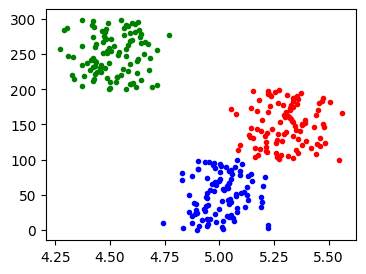

In [ ]:
draw_graph(std=0.1)
#         표준편차
# 분산이 작다 -> 평균에 관찰값들이 모여있음
# 분산이 크다 -> 평균에 관찰값들이 퍼져있음

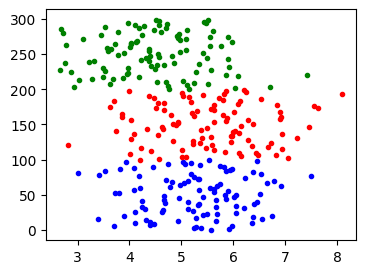

In [ ]:
draw_graph(std=1)

#### 4-2.일원분산분석(One-way ANOVA)
- 독립변수 : 범주형 1개, 종속변수 : 연속형
- 독립변수의 변화가 종속변수에 미치는 영향을 보기 위해 사용
- 가정 : 독립성, 정규성, 등분산성
- scipy.stats이나 statsmodel 라이브러리를 이용

In [ ]:
# 예시 데이터 설명
# iris의 target이 0 : 'setosa', 1 : 'versicolor', 2: 'virginica' 품종
# 독립변수 :'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
# 품종별 sepal, petal의 length, width가 차이를 보일까?에 anova 사용

In [ ]:
# [1] 데이터 가져오기
import pandas as pd

iris = pd.read_csv('bigdata/iris_data.csv')
print(iris.head())
iris.columns = ['sepal_length', 'sepal_width',
                'petal_length', 'petal_width', 'target']
iris.columns

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [ ]:
# [2-1] 품종별 각 변수의 평균 확인
iris.groupby('target').mean()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [ ]:
# [2-2] 특정 변수에 대한 품종별 평균 확인
feature = 'sepal_width'
iris.groupby('target')['sepal_width'].mean()

target
0    3.428
1    2.770
2    2.974
Name: sepal_width, dtype: float64

In [ ]:
# group 0, 1, 2의 평균의 차이가 있습니다
# 평균값의 차이가 실제로 의미가 있는 차이인지 알고 싶다면,
# 분산 분석을 통해 통계적 유의성을 알아 볼 수 있습니다.

In [ ]:
for x in iris.groupby('target')[feature] :
  print(x[0], x[1].values)

0 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]
1 [3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]
2 [3.3 2.7 3.  2.9 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8
 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.
 3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.  3.4 3. ]


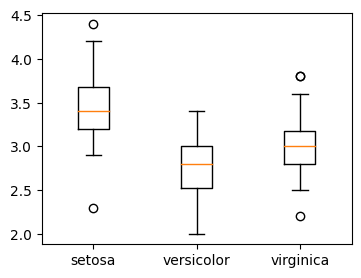

In [ ]:
# [3] 그룹 추출 및 그래프로 확인
# 안 보고 만들 수 있어야함
import matplotlib.pyplot as plt

data = [x[1].values for x in iris.groupby('target')[feature]]

plt.figure(figsize=(4,3))
plt.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])
plt.show()

In [ ]:
# [4] 정규성 확인
# p-value가 0.05 보다 큰 값일 때 정규성을 갖음
from scipy.stats import shapiro

data = [x[1].values for x in iris.groupby('target')[feature]]
_, pvalue0 = shapiro(data[0])
_, pvalue1 = shapiro(data[1])
_, pvalue2 = shapiro(data[2])
print(f'{pvalue0:.4f} {pvalue1:.4f} {pvalue2:.4f}')
# 0.2715 0.3380 0.1809

0.2715 0.3380 0.1809


In [ ]:
# [5] 등분산성 확인
# p-value가 0.05 보다 큰 값일 때 등분산성을 갖음
from scipy.stats import bartlett

# 방법 1
#_, pvalue = bartlett(data[0], data[1], data[2])

# 방법 2
_, pvalue = bartlett(*data)
print(f'{pvalue:.4f}') # 0.3515

0.3515


Scipy.stats 으로 일원분산분석
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [ ]:
# [6] 일원분산분석 - 1
from scipy.stats import f_oneway

F, pvalue = f_oneway(*data)
print(f'iris 데이터의 일원분산분석 결과 : F = {F:.1f}, p = {pvalue:.5f}')
if pvalue < 0.05 :
  print('P - value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미한 차이가 있음')

iris 데이터의 일원분산분석 결과 : F = 49.2, p = 0.00000
P - value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미한 차이가 있음


pandas 와 statsmodels 를 사용한 일원분산분석
- https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html
- https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html

ols (ordinary least squares) 모델
- 구하려는 해와 실제의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법

'value ~ C(treatment)' : '종속변수 ~ C(독립변수)'
- value : 종속변수
- treatment : 범주형(C)인 독립변수
- df : degree of freedom
- C(treatment)의 df : 그룹의 수 - 1
- Residual의 df : 전체 데이터 수 - 그룹의 수

In [ ]:
# [7] 일원분산분석 - 2
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = iris[['target', 'sepal_width']]
lm = ols('sepal_width ~ C(target)', data).fit()
#        종속변수       범주형은 C로 묶
result = sm.stats.anova_lm(lm)
print(result)

              df     sum_sq   mean_sq         F        PR(>F)
C(target)    2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual   147.0  16.962000  0.115388       NaN           NaN


In [ ]:
# C(target)의 PR(=p-value) 값이 0.05 보다 작으므로 그룹의
# 평균값이 통계적으로 유의미하게 차이가 있음

In [ ]:
# 구체적으로 어떤 집단이 차이가 있는지 확인하려면 사후분석(post hoc tests)를 해야함
# 유의미한 차이가 없는 경우는 사후분석할 필요가 없음

사후검정(Post Hoc Analysis)
- ANOVA 분석의 문제 : 다르다는 것은 알지만, 어떤 집단간의 차이가 있는지는 알 수 없음
- 사후검정을 통해 어떤 것에 차이가 있는지 찾을 수 있음
- post hoc은 라틴어로 "after this"의 뜻
- 사후검정의 종류
    - Tukey's HSD (Honest Significant Difference) test : 정규분포, 등분산, 동일 표본 크기에서 가장 많이 사용
    - Duncan’s new multiple range test (MRT) : 정규분포, 등분산, 동일 표본 크기에서 사용, 엄격하지 않은 기준으로 통계적 유의성을 도출하기 쉬움
    - Scheffé’s Method : 가장 보수적이고 엄격한 사후검정방식 (동일하지 않은 표본 크기)
- 민감도(sensitivity)로 구분 : Scheffe < Tukey < Duncan
- Duncan의 방법은 작은 차이에도 차이가 난다라고 하지만, Scheffe의 방법은 확실한 차이가 나야만 비로소 차이가 있다라고 판단함


Tukey test
- statsmodels의 Tukey test를 하기 위해서는 DataFrame의 형태를 변경해야 함
- 하나의 컬럼은 분류할수 있는 이름(label)을 다른 컬럼은 실험값(values)를 가지고 있는 형태이어야 함

[참고] scheffe : https://eunholand.tistory.com/96

In [ ]:
# [7] 사후 검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(iris.sepal_width, iris.target, alpha = 0.05)
print(posthoc)

# 대립가설 : 차이가 있다
# 귀무가설 : 차이가 없다

'''
p-adj
0.0
0.0
0.0088
'''

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.658    0.0 -0.8189 -0.4971   True
     0      2   -0.454    0.0 -0.6149 -0.2931   True
     1      2    0.204 0.0088  0.0431  0.3649   True
----------------------------------------------------


'\np-adj\n0.0 \n0.0 \n0.0088  \n'

In [ ]:
# 결과를 보면 모든 그룹에서 통계적인 유의미성(P-value < 0.05)을 가질 수 있는것을 확인 할 수 있음

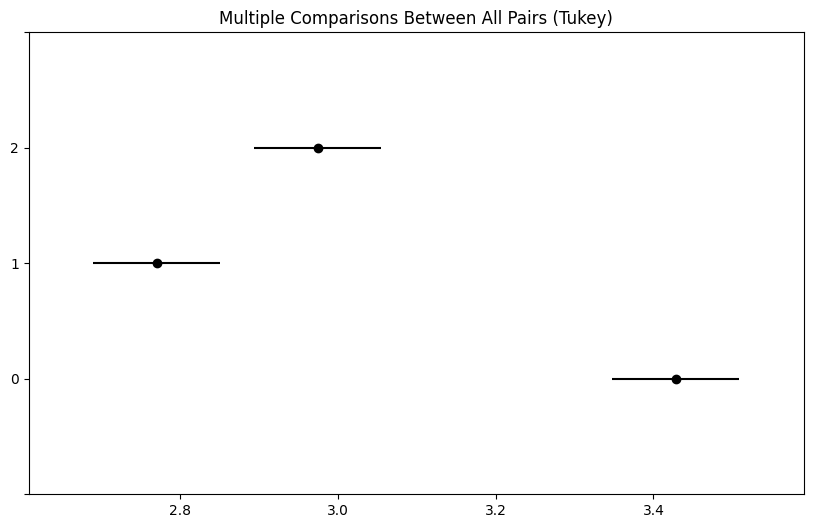

In [ ]:
# [8] 그림으로 확인하기
fig = posthoc.plot_simultaneous()
#fig = posthoc.plot_simultaneous()

In [ ]:
# 통계적 의미 갖지 않는 경우
# 그림에서 볼 수 있듯이, 그룹 1.0과 2.0은 서로 겹치지 않는것을 볼 수 있음
# 반면,1과 3, 2와 3은 겹치기 때문에 유의미한 차이가 없다고 할 수 있음

In [ ]:
##  23년 5월 31일 오전 - 여기까지

#### 4-3.이원분산분석(Two-way ANOVA)
- 독립변인의 수가 두 개일 때 집단 간 차이가 유의한지를 검증하는 데 사용
- 상호작용효과(Interaction effect) 즉, 한 변수의 변화가 결과에 미치는 영향이 다른 변수의 수준에 따라 달라지는지를 확인하기 위해 사용됨
- scipy.stats이나 statsmodels 라이브러리를 이용

예제 데이터(altman_12_6) 설명
태아의 머리 둘레 측정 데이터입니다.
4명의 관측자가 3명의 태아를 대상으로 측정을 했습니다.
이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사하였습니다.

In [ ]:
# [1] 데이터 가져오기
import pandas as pd
data = pd.read_csv('data_02/altman.csv')
data.tail()

,head_size,fetus,observer
31,12.7,3.0,3.0
32,12.5,3.0,3.0
33,13.0,3.0,4.0
34,12.9,3.0,4.0
35,13.8,3.0,4.0


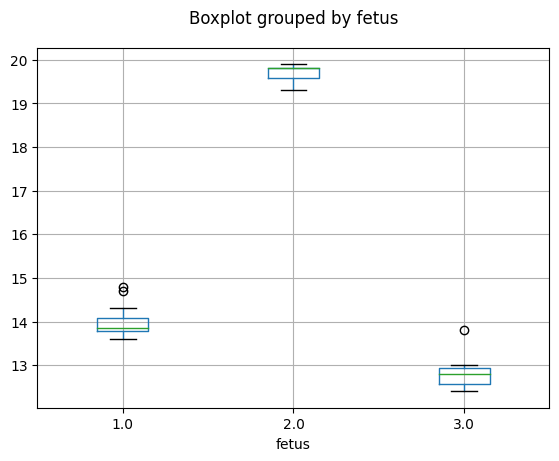

In [ ]:
# [2] 태아별 머리 둘레 plot 만들기
import matplotlib.pyplot as plt
data.boxplot(column='head_size', by='fetus' , grid=True)
plt.title('')
plt.show()

In [ ]:
# [3] 태아별 머리 둘레 평균을 구해봅니다
data.groupby('fetus')['head_size'].mean()

fetus
1.0    13.991667
2.0    19.691667
3.0    12.825000
Name: head_size, dtype: float64

In [ ]:
# 그림에서 태아(fetus) 3명의 머리 둘레는 차이가 있어 보입니다.
# 관측자와 태아에 상호작용 효과 여부를 Two way ANOVA를 통해 알아 보겠습니다

In [ ]:
# 귀무가설 : 관측자별 머리둘레 평균은 동일하다
# 대립가설 : 관측자별 머리둘레 평균은 동일하지 않다 (차이가 있다)
# 귀무가설 : 태아별 머리둘레 평균은 동일하다
# 대립가설 : 태아별 머리둘레 평균은 동일하지 않다 (차이가 있다)
# 귀무가설 : 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 없다
# 대립가설 : 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 있다

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



In [ ]:
# C(fetus):C(observer)의 P-value 가 0.05 이상 입니다,
# 따라서 귀무가설을 기각할 수 없고.
# 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 없다
